# 划分数据集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol',
                  'Malic acid','Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols',
                  'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline'] #设置列标题
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [5]:
print('Class labels',np.unique(df_wine['Class label'])) #查看类标数量

Class labels [1 2 3]


In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 特征缩放

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mms = MinMaxScaler() #特征归一化0~1，特征标准化-1~1，一般来说标准化呈正态分布，更新权重更方便

In [12]:
X_train_norm = mms.fit_transform(X_train)

In [13]:
X_test_norm = mms.transform(X_test)

In [18]:
X_train_norm[0:5]

array([[0.35263158, 0.03952569, 0.        , 0.        , 0.19565217,
        0.34482759, 0.04852321, 0.26923077, 0.00315457, 0.05716724,
        0.43103448, 0.2014652 , 0.16546763],
       [0.47894737, 0.5       , 0.65240642, 0.58762887, 0.39130435,
        0.23103448, 0.05485232, 0.88461538, 0.17350158, 0.3668942 ,
        0.27586207, 0.30769231, 0.20143885],
       [0.43157895, 0.04743083, 0.47058824, 0.3814433 , 0.31521739,
        0.42068966, 0.33755274, 0.30769231, 0.33123028, 0.11433447,
        0.5862069 , 0.69230769, 0.11510791],
       [0.71315789, 0.18379447, 0.47593583, 0.29896907, 0.52173913,
        0.55862069, 0.54008439, 0.13461538, 0.38170347, 0.38993174,
        0.31896552, 0.70695971, 0.55395683],
       [0.34210526, 0.04940711, 0.31550802, 0.21649485, 0.7173913 ,
        0.31724138, 0.3185654 , 0.40384615, 0.74132492, 0.18088737,
        0.43965517, 0.38095238, 0.33093525]])

In [19]:
X_train_std[:5]

array([[-0.8344164 , -1.21356355, -3.80004953, -2.6386402 , -0.8228463 ,
        -0.48832793, -1.38930938, -0.67566145, -2.00126641, -1.41686674,
         0.42347195, -1.05244897, -0.76922214],
       [-0.24604459,  0.80673481,  0.81109584,  0.77615591,  0.36897261,
        -1.02104931, -1.3599811 ,  1.83466125, -1.07209709,  0.21841546,
        -0.37321499, -0.64923072, -0.60690585],
       [-0.46668402, -1.17888032, -0.47397746, -0.42201817, -0.09451252,
        -0.13318035, -0.04998423, -0.51876628, -0.21175513, -1.11503779,
         1.22015889,  0.81069743, -0.99646495],
       [ 0.8448948 , -0.58059454, -0.43618119, -0.90128779,  1.16351855,
         0.51254254,  0.88852098, -1.22479454,  0.06355429,  0.34004802,
        -0.15191307,  0.86631374,  0.98379381],
       [-0.88344739, -1.17020951, -1.57006939, -1.38055742,  2.35533746,
        -0.61747251, -0.1379691 , -0.12652836,  2.02513396, -0.76365484,
         0.46773233, -0.37114917, -0.0225672 ]])

# 特征选择

### L1正则化满足数据稀疏化

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(penalty='l1',C=1.0,multi_class='auto',solver='liblinear')

In [22]:
lr.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
print ('Training accuracy:',lr.score(X_train_std,y_train))

Training accuracy: 1.0


In [24]:
print ('test accuracy:',lr.score(X_test_std,y_test))

test accuracy: 1.0


In [25]:
lr.intercept_ #获得截距项

array([-1.23581815, -1.55006765, -2.16324157])

In [26]:
lr.coef_ #获得权重系数，有三个权重是针对多分类的情况所采用的一对多方法OvR

array([[ 1.00245814,  0.23805426,  0.55447017, -1.27907084, -0.11421852,
         0.        ,  0.75016621,  0.        ,  0.        ,  0.        ,
         0.        ,  1.17598257,  2.47743112],
       [-1.4135733 , -0.49126129, -0.99132137,  0.57146588,  0.        ,
         0.        ,  0.51360929,  0.26326905,  0.02171131, -1.98922656,
         1.30055107,  0.        , -2.00290959],
       [ 0.06074552,  0.20762036,  0.3272259 ,  0.        ,  0.        ,
         0.        , -2.07800723,  0.        ,  0.        ,  1.502394  ,
        -1.55109634, -0.53140811,  0.        ]])

### 正则化效果图（暂略）

### 特征选择算法

#### SBS (暂略)

In [27]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

# 主成分分析

##  方差贡献率

In [7]:
cov_mat = np.cov(X_train_std.T)#获取协方差
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)#计算矩阵的特征值和右特征向量
print ('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.45044098 2.49130383 1.61242691 1.08422106 0.83211816 0.71803371
 0.48699143 0.39314368 0.1022328  0.15234913 0.31671066 0.23746792
 0.22825078]


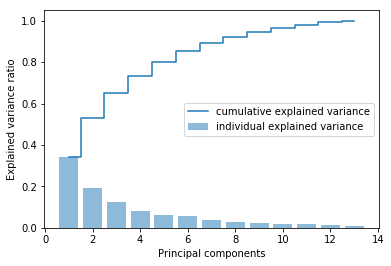

In [8]:
tot = sum(eigen_vals)
var_exp = [(i/tot)
          for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)#按照所给定的轴参数返回元素的梯形累计和

plt.bar(range(1,14),var_exp, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.step(range(1,14),cum_var_exp,where='mid',
        label = 'cumulative explained variance')#绘制步进图
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

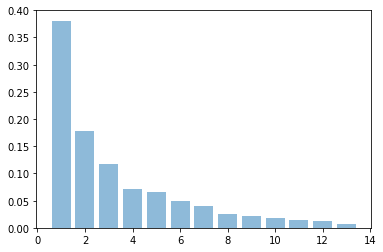

In [5]:
'''sklearn实现主成分分析重要性分布'''
from sklearn.decomposition import PCA
pca_nc = PCA()
pca_nc.fit(X_train_std)
var_skn=pca_nc.explained_variance_ratio_.tolist()
plt.bar(range(1,14),var_skn, alpha=0.5,align='center',
       label = 'individual explained variance')#柱状图
plt.show()

## 特征转换